In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key
from datetime import datetime
from citipy import citipy



In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | karasjok
Processing Record 4 of Set 1 | bilma
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kodinsk
Processing Record 7 of Set 1 | kholodnyy
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | litoral del san juan
City not found. Skipping...
Processing Record 11 of Set 1 | derac
Processing Record 12 of Set 1 | necochea
Processing Record 13 of Set 1 | warqla
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | salinopolis
Processing Record 16 of Set 1 | kuche
City not found. Skipping...
Processing Record 17 of Set 1 | grindavik
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | albany
Processing

Processing Record 35 of Set 4 | wamba
Processing Record 36 of Set 4 | kaitangata
Processing Record 37 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 4 | emerald
Processing Record 39 of Set 4 | luanda
Processing Record 40 of Set 4 | rodrigues alves
Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | pandan
Processing Record 44 of Set 4 | lata
Processing Record 45 of Set 4 | halifax
Processing Record 46 of Set 4 | gharghoda
Processing Record 47 of Set 4 | shimoda
Processing Record 48 of Set 4 | krotoszyn
Processing Record 49 of Set 4 | naze
Processing Record 50 of Set 4 | vilhena
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | tabas
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | luganville
Processing Record 6 of Set 5 | the valley
Processing Record 7 o

Processing Record 27 of Set 8 | kavieng
Processing Record 28 of Set 8 | shemursha
Processing Record 29 of Set 8 | leningradskiy
Processing Record 30 of Set 8 | makakilo city
Processing Record 31 of Set 8 | hofn
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | yarada
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | kargasok
Processing Record 38 of Set 8 | nouakchott
Processing Record 39 of Set 8 | bowling green
Processing Record 40 of Set 8 | ladushkin
Processing Record 41 of Set 8 | dudinka
Processing Record 42 of Set 8 | boyolangu
Processing Record 43 of Set 8 | labutta
City not found. Skipping...
Processing Record 44 of Set 8 | bloomfield
Processing Record 45 of Set 8 | satitoa
City not found. Skipping...
Processing Record 46 of Set 8 | waipawa
Processing Record 47 of Set 8 | biak
Processing Record 48 of Set 8 | airai
Processin

Processing Record 12 of Set 12 | adrar
Processing Record 13 of Set 12 | ajdabiya
Processing Record 14 of Set 12 | jumla
Processing Record 15 of Set 12 | banyo
Processing Record 16 of Set 12 | veinticinco de mayo
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | agadez
Processing Record 19 of Set 12 | tambun
Processing Record 20 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 21 of Set 12 | san patricio
Processing Record 22 of Set 12 | umirim
Processing Record 23 of Set 12 | sinfra
Processing Record 24 of Set 12 | mentok
City not found. Skipping...
Processing Record 25 of Set 12 | buala
Processing Record 26 of Set 12 | nabire
Processing Record 27 of Set 12 | taltal
Processing Record 28 of Set 12 | altay
Processing Record 29 of Set 12 | pringsewu
Processing Record 30 of Set 12 | ankang
Processing Record 31 of Set 12 | maralal
Processing Record 32 of Set 12 | ciudad bolivar
Processing Record 33 of Set 12 | beyneu
Processing Record 34 of Set 12 |

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.41,72,18,16.31,PF,2021-08-12 02:30:20
1,Hermanus,-34.4187,19.2345,48.90,83,100,10.71,ZA,2021-08-12 02:27:35
2,Karasjok,69.4719,25.5112,53.71,94,96,4.23,NO,2021-08-12 02:31:54
3,Bilma,18.6853,12.9164,88.54,38,76,10.22,NE,2021-08-12 02:31:55
4,Mataura,-46.1927,168.8643,59.49,78,100,6.60,NZ,2021-08-12 02:28:19
...,...,...,...,...,...,...,...,...,...
569,Ouango,4.3133,22.5552,68.11,98,100,1.10,CF,2021-08-12 02:34:23
570,Huarmey,-10.0681,-78.1522,62.71,85,70,8.41,PE,2021-08-12 02:34:23
571,Solvychegodsk,61.3305,46.9156,62.51,95,100,5.84,RU,2021-08-12 02:34:24
572,San Roque,36.2107,-5.3842,72.43,88,50,3.44,ES,2021-08-12 02:34:24


In [14]:
# Reorder the columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-08-12 02:30:20,-9.8000,-139.0333,77.41,72,18,16.31
1,Hermanus,ZA,2021-08-12 02:27:35,-34.4187,19.2345,48.90,83,100,10.71
2,Karasjok,NO,2021-08-12 02:31:54,69.4719,25.5112,53.71,94,96,4.23
3,Bilma,NE,2021-08-12 02:31:55,18.6853,12.9164,88.54,38,76,10.22
4,Mataura,NZ,2021-08-12 02:28:19,-46.1927,168.8643,59.49,78,100,6.60
...,...,...,...,...,...,...,...,...,...
569,Ouango,CF,2021-08-12 02:34:23,4.3133,22.5552,68.11,98,100,1.10
570,Huarmey,PE,2021-08-12 02:34:23,-10.0681,-78.1522,62.71,85,70,8.41
571,Solvychegodsk,RU,2021-08-12 02:34:24,61.3305,46.9156,62.51,95,100,5.84
572,San Roque,ES,2021-08-12 02:34:24,36.2107,-5.3842,72.43,88,50,3.44


In [15]:

# Create the output file (CSV).
output_data_file = "WeatherPy_Database.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")



In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1628735665.0512488

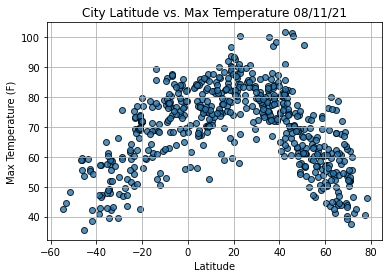

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

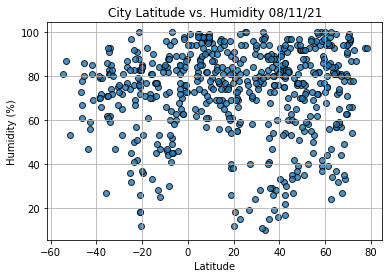

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot.
plt.show()

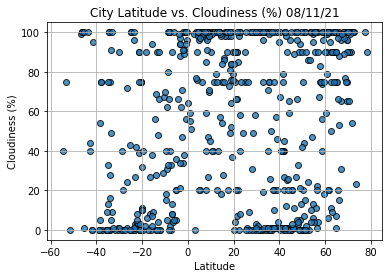

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot.
plt.show()

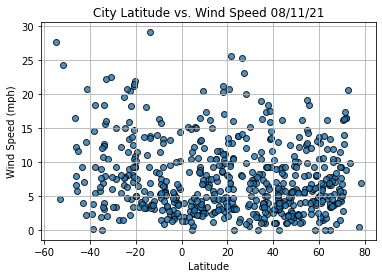

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot.
plt.show()


In [22]:

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df


NameError: name 'southern_hemi_df' is not defined

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))